# NSD Final Project

## Deep Hedging 

### Team member: 李心怡，尉银杰

$$
\newcommand{\supp}{\mathrm{supp}}
\newcommand{\E}{\mathbb{E} }
\newcommand{\Eof}[1]{\mathbb{E}\left[ #1 \right]}
\def\Cov{{ \mbox{Cov} }}
\def\Var{{ \mbox{Var} }}
\newcommand{\1}{\mathbf{1} }
\newcommand{\PP}{\mathbb{P} }
\newcommand{\Pof}[1]{\mathbb{P}\left[ #1 \right]}
%\newcommand{\Pr}{\mathrm{Pr} }
\newcommand{\QQ}{\mathbb{Q} }
\newcommand{\RR}{\mathbb{R} }
\newcommand{\EE}{\mathbb{E} }
\newcommand{\DD}{\mathbb{D} }
\newcommand{\HH}{\mathbb{H} }
\newcommand{\spn}{\mathrm{span} }
\newcommand{\cov}{\mathrm{cov} }
\newcommand{\sgn}{\mathrm{sgn} }
\newcommand{\HS}{\mathcal{L}_{\mathrm{HS}} }
%\newcommand{\HS}{\mathrm{HS} }
\newcommand{\trace}{\mathrm{trace} }
\newcommand{\LL}{\mathcal{L} }
%\newcommand{\LL}{\mathrm{L} }
\newcommand{\s}{\mathcal{S} }
\newcommand{\ee}{\mathcal{E} }
\newcommand{\ff}{\mathcal{F} }
\newcommand{\hh}{\mathcal{H} }
\newcommand{\bb}{\mathcal{B} }
\newcommand{\dd}{\mathcal{D} }
\newcommand{\xx}{\mathcal{X} }
\newcommand{\nn}{\mathcal{NN} }
\newcommand{\g}{\mathcal{G} }
\newcommand{\p}{\partial}
\newcommand{\half}{\frac{1}{2} }
\newcommand{\T}{\mathcal{T} }
\newcommand{\bi}{\begin{itemize}}
\newcommand{\ei}{\end{itemize}}
\newcommand{\beq}{\begin{equation}}
\newcommand{\eeq}{\end{equation}}
\newcommand{\beas}{\begin{eqnarray*}}
\newcommand{\eeas}{\end{eqnarray*}}
\newcommand{\cO}{\mathcal{O}}
\newcommand{\cF}{\mathcal{F}}
\newcommand{\cL}{\mathcal{L}}
\newcommand{\BS}{\text{BS}}
$$

## Abstract

This project replicates the "Deep Hedging" strategy as proposed by Buehler et al, 2019[1]. We consider the problem of hedging an at-the-money European Option liability which matures in 30 days. We show that a semi-rucurrent neural network significantly reduce CVar of the portfolio from 2.3 to 1.7 (compared to 1.0 from Heston-model-hedging). We also built a the weekly-rebalancing strategy for SPX500 data, and its benchmark BS-model-hedging with a CVar of 2.7. However, due to computation limit, we can not perform the experiment on SPX500 with enough sample.

## Table of Content

- 1 introduction
- 2 Theory and Setting
<ul>
- 2.1 Setting
<ul>
- 2.1.1 Discrete-time Market with Friction
- 2.1.2 Hedging under Convex Risk Measures
- 2.1.3 Pricing under Convex Risk Measures
- 2.1.4 Conditional Value at Risk (CVar)
</ul>
- 2.2 Neural Network
<ul>
- 2.2.1 Definition of neural networks
- 2.2.2 Semi-recurrent Neural Networks
- 2.2.3 Loss Function for Neural Networks
</ul>
</ul>
- 3 Numerical Experiments
<ul>
- 3.1 Hedging on Simulated Data
<ul>
- 3.1.1 Deep Hedging
- 3.1.2 Heston Model Hedging
- 3.1.3 Performance comparison
</ul>
- 3.2 Hedging on SXP500 Data
<ul>
- 3.1.1 Deep Hedging
- 3.1.2 Black-Scholes Model Hedging
- 3.1.3 Performance comparison
</ul>
</ul>
- 4 Conclusion
- 5 Reference

## 1 Introduction

- Hedging has always been a main concern for the sellside. Classic delta hedging approach based on Black–Scholes model and its variants may not work well in reality, as the underlying model might be wrong.

- With the rise of modern machine learning techniques, more and more researchers tried to implement a model-free method which allows for theoretically perfect hedging. In addition, it is easier to add market frictions to such strategy.

- Buehler et al, 2019[1] introduces a semi-recurrent neural network model for "Deep Hedging" and measures its performance on simulated and real data. This project intends to replicate the experiments in this paper.




## 2 Theory And Setting

In the following sections, we want hedge a liability $Z$, specifically, an at-the-money European option strikes at $K$. We can hedge out portfolio with one or two instruments (either stock or variance swap) and minimize the CVAR. We elaborate the setting and notations below.

### 2.1 Setting
 


#### 2.1.1 Discrete-time Market with Friction

##### Discrete-time

Below are some basic notations for a discrete-time market.

- $T$: finite time horizon, maximum maturity of all instruments.

- $0=t_0<t_1<\cdots <t_n=T$: trading dates.

- $I_k \in \RR^r$: any NEW market information at time $t_k$.

- $\ff_k$: any market information at time $t_k$.

- $S = (S_k)_{k=0,1,\dots ,n}$, $S_k \in \RR_d$: prices of $d$ hedging instruments adapted to filtration $\ff$, including primary assets like equities and secondary assets like options.

- $Z$: agent's liabilities, which is a contingent claim and is adapted to filtration $\ff$.

- $\delta = (\delta_k)_{k=0,1,\dots ,n}$, $\delta_k \in \RR_d$: hedging strategy, where $\delta_k^i$ denotes agent's holdings of the $i$th asset at time $t_k$, and we stipulate that $\delta_{-1}=\delta_n=0$.

- $p_0$: addtional cash injected to the agent's portfolio at time $0$.



##### Frictions

We define the following variables to allow frictions in the market:

- $\hh^u$: unconstrained set of hedging strategy $\delta$.

- $\hh_k^c$: constrained set of the holdings at time $t_k$ due to liquidity, asset availability and trading restrictions.

- $H_k: \RR^{d(k+1)}\rightarrow\RR^{d}$: function that computes constrained holdings $\delta_k^c\in \hh_k^c$ from unconstrained holdings $\delta_k^u\in \hh^u$ and constrained holdings $\{\delta_i^c\in \hh_i^c\}$ for $i \in \{0,1,...,k-1\}$.

- $H$: constrained "projection" from $\hh^u$ to $\hh_k^c$. It can be defined successively as $(H\circ\delta_k^u)_k = H_k\{(H\circ\delta_0^u)_0,(H\circ\delta_1^u)_1,...,(H\circ\delta_{k-1}^u)_{k-1}, \delta_k^u\}$

- $c_k(\delta_k-\delta_{k-1})$: cost of trading incurred at time $t_k$ for changing the holdings from $\delta_k$ to $\delta_{k-1}$. Typically it takes one of the following forms:
<ul>
    
- Proportional transaction cost: $c_k(n) = \sum_{i=1}^d c_k^iS_k^i|n^i|$

- Fixed transaction cost: $c_k(n) = \sum_{i=1}^d c_k^i1_{|n^i|\ge \epsilon}$

- Complex cross asset cost: such as the cost of volatility
</ul>

- $C_T(\delta) = \sum_{k=1}^T c_k(\delta_k-\delta_{k-1})$: total transaction costs of trading a strategy $\delta$ up to maturity $T$.




#### Portfolio Value

Given the notations above, we have the terminal value of the agent's portfolio:
$$PL_T(Z,p_0,\delta) = -Z+p_0+(\delta\cdot S)_T-C_T(\delta)$$

#### 2.1.2 Hedging under Convex Risk Measures

In a complete market without frictions, there exists a unique hedging strategy $\delta$ and a fair price $p_0$ such that $PL_T=0$ holds a.s. However, that is not the case in an incomplete market with friction. Thus, we have to first define a optimality criterion (here we choose convex risk measures). Then we define the optimal hedging strategy as a minimizer of that criterion.

##### Definition of convex risk measure



$\rho: \xx\rightarrow\RR$ is a convex risk measures if it satisfies:

- Monotone decreasing: if $X_1\ge X_2$ then $\rho(X_1)\le \rho(X_2)$.

- Convex: $\rho(aX_1+(1-a)X_2)\le a\rho(X_1)_(1-a)\rho(X_2)$ for $a\in [0,1]$

- Cash-Invariant: $\rho(X+c) = \rho(X)-c$ for $c\in\RR$
    
where $X_1, X_2, X\in\xx$ are asset positions, and comparisons between asset positions represents agent's preference. If $\rho(0)=0$ we call it normalized.

##### Optimal hedging strategy

Given the convex risk measure, our optimality problem for hedging becomes

$$
\pi(-Z) =\underset{\delta\in\hh^c}\inf\rho(-Z+(\delta\cdot S)_T-C_T(\delta)),
$$

where $\hh^c$ is the constrained set for trading strategy $\delta$.

So the optimal hedging policy $\delta$ is defined as the minimizer of $\pi(-Z)$.

##### Remark

Some literature uses risk adjusted return $\rho(X)=\EE[X]-\lambda Var(X)$ as the objective function, which is an ituitive measure of hedging performance. However it does not satisfy the monotone decreasing property, so it is not a convex risk measure. Therefore we will not use it in this project.

#### 2.1.3 Pricing under Convex Risk Measures

In an incomplete market with friction, a fair price of $Z$ no longer exists, so we need to define an indifference price $p(Z)$.

##### Definition of indifference price

$p(Z)$ is the indifferent price of $Z$ that satisfies:

$$
\pi(-Z+p(Z))=\pi(0)\\
$$

By cash-invariant property of $\pi$ (which can be deduced from the cash-invariant property of $\rho$):

$$
p(Z) = \pi(-Z)-\pi(0)
$$

##### Remark

Financial meaning of indifference price: the minimal amount of cash we need to charge in order to make us indifferent between taking the position $-Z$ and not doing so under risk measure $\rho$.


#### 2.1.4 Setting 4 - Conditional Value at Risk (CVar)

We will choose the convex risk measure $\rho$ to be conditional value at risk (CVar, a.k.a. average value at risk or expected shortfall) in our numerical experiments. 

##### Definition of CVar

For random variable $X$, CVar is defined as follows:

$$
CVar(X)= \frac1{1-\alpha}\int_0^{1-\alpha}VaR_\gamma(X)dX
$$

where $\alpha \in [0,1)$ is known as level of risk aversion, and $VaR_\gamma(X) = \inf\{m\in\RR:\PP(X<-m)\le \gamma\}$.

##### Remark

Finacial meaning of CVar:

- $X$ is the return.

- Value at risk ($VaR_\gamma$) means that, with probability $\gamma$, we will get a return worse than $-VaR_\gamma$. In contrast to other risk measure like variance, it mainly focuses on the risk of potential shortfalls, and ignores how good returns can be for the top $100(1-\gamma)$ percent cases. 

- Conditional value at risk (CVar) takes the average of $VaR$ from $\gamma=0$ to $\gamma=1-\alpha$. It focuses the distribution of the bottom $100(1-\alpha)$ percent returns. 
<ul>
- For $\alpha$ close to 1 (i.e. $1-\alpha$ close to 0), we focus more on extremely bad cases and favor those strategies that give us less extremely bad returns (but also potentially less good returns). 
- For $\alpha$ close to 0 (i.e. $1-\alpha$ close to 1), CVar converges to expected return, i.e. we only concern about the average return regardless of its distribution (risk).
</ul>
Therefore $\alpha$ can ituitively be thought of as level of risk aversion (larger the $\alpha$, more risk averse).

### 2.2 Neural Networks

#### 2.2.1 Definition of neural networks

A function $F:\RR^{N_0}\rightarrow\RR^{N_L}$ defined as

$$
F(x)=W_L\circ F_{L-1}\circ...\circ F_0
$$

is a feed forward neural network, where

- $L$: number of layer in neural network.

- $N_l$, $l\in \{0,1,...,L\}$: dimention of the $l$th layer. ($N_0$ input dimension, $N_L$ output dimension)

- $W_l(x) = A_lx+b_l$: affine function transforming the input $x$ from dimension $N_{l-1}$ to $N_l$.

- $\sigma:\RR\rightarrow\RR$: non-linear function (activation function) applied componentwise.

- $F_l(x) = \sigma\circ W_l(x)$: the $l$th layer in neural network.

##### Remark

- We denote by $\nn_{M,d_0,d_1}$ the set of neural networks that has $M$ non-zero parameters, input dimension $d_0$, output dimension $d_1$.

- Literature proved that neural networks with infinity number of parameters can approximate multivariate functions arbitrarily well, which serves as theoretical fundation for using neural networks to approximate our hedging strategy $\delta$.

#### 2.2.2 Semi-recurrent Neural Networks

We will use the following semi-recurrent neural network to approximate the optimal hedging strategy $\delta$:

$$
\delta_k = F_k(I_0,...,I_k,\delta_{k-1}) 
$$

for $k\in\{0,1,...,n-1\}$, where

$$
F_k\in \nn_{M,r(k+1)+d,d}.
$$

As a reminder:
- n is the number of trading dates, i.e. the time when we change our holdings.
- r is the dimension of new information $I_k$.


##### Remark

- Financial meaning of semi-recurrent neural network: at each time $t_k$, we input not only all the information available by the time $t_k$, but also our holdings $\delta_{k-1}$ which is computed previously from the same neural network (except $k=0$ when $\delta_{-1}$ is set to 0).

- In numerical experiment below, we will simplify the semi-recurrent neural network to

$$
\delta_k = F_k(I_k,\delta_{k-1}) ,
$$

i.e. our network only takes new information and current holdings as input and ignores the historical infomation.

![title](semi_recurrent_nn.png)

#### 2.2.3 Loss Function for Neural Networks

In previous cells we have written the following objective function:

$$
\pi(-Z) =\underset{\delta\in\hh^c}\inf\rho(-Z+(\delta\cdot S)_T-C_T(\delta)).
$$

To make the constrained function an unconstrained one, we use the "projection" defined previously:

$$
\pi(-Z) =\underset{\delta\in\hh^u}\inf\rho(-Z+(H\circ\delta\cdot S)_T-C_T(H\circ\delta)).
$$

Now that $\delta$ is the output of the semi-recurrent neural network with $M$ parameters, we define $\hh_M$ the set of possible $\delta$ as
\begin{eqnarray*}
\hh_M
&=&\{
(\delta_k)_{k=0,1,...,n-1}\in\hh^u: 
\delta_k = F_k(I_0,...,I_k,\delta_{k-1})&,&
F_k\in \nn_{M,r(k+1)+d,d}
\}\\
&=&\{
(\delta_k^\theta)_{k=0,1,...,n-1}\in\hh^u: 
\delta_k^\theta = F^{\theta_k}(I_0,...,I_k,\delta_{k-1}^\theta)&,&
\theta_k\in \Theta_{M,r(k+1)+d,d}
\}
\end{eqnarray*}
where
- $\theta_k$ denotes network parameters for $F_k$. Note that $\theta_k$ is different for each $k$.
- $\Theta_{M,r(k+1)+d,d}$ denotes the parameter space for $\nn_{M,r(k+1)+d,d}$.
- $\delta_k^\theta$ denotes the holdings at time $t_k$ computed given $\theta_k\in \Theta_{M,r(k+1)+d,d}$.

Therefore, we have the final form of objective function
\begin{eqnarray*}
\pi^M(-Z)
&=&
\underset{\delta\in\hh_M}\inf\rho(-Z+(H\circ\delta\cdot S)_T-C_T(H\circ\delta)).\\
&=&
\underset{\theta\in\Theta_M}\inf\rho(-Z+(H\circ\delta^\theta\cdot S)_T-C_T(H\circ\delta^\theta))\\
\end{eqnarray*}
where $\Theta_M=\prod_{k=0}^{n-1}\Theta_{M,r(k+1)+d,d}$,

and solving this function is the same as finding finite dimensional parameter $\theta$ for our NN that minimize the following loss function
$$
L(\theta)=\rho(-Z+(H\circ\delta^\theta\cdot S)_T-C_T(H\circ\delta^\theta))
$$

##### Remark

- Because the neural network can approximate arbitrarily well when $M\rightarrow\infty$, $\hh_M\approx\hh^u$. So the optimal strategy computed using NN should be close to the real optimal solution.

- In practice we use gradient descent of the loss function w.r.t. the network parameters to training network. However, our network output $\delta^\theta$ is always transformed by the "projection" function $H$ in the loss function. As a result, if $\delta^\theta\notin \hh^c$, loss function can not pass this information through gradient descent to network parameters. Therefore, when $H\circ\delta^\theta=\delta^\theta$ is satisfied for all $\delta^\theta\in\hh^c$, we typically add a panelty term to the loss function:

$$
L(\theta)=\rho(-Z+(H\circ\delta^\theta\cdot S)_T-C_T(H\circ\delta^\theta))-\gamma\lVert \delta^\theta-H\circ\delta^\theta\rVert_1
$$

with $\gamma\gg 0$.

## 3 Numerical Experiments 

We will reproduce in total 2 numerical experiments, both for hedging at-the-money vanilla call option (rebalance daily, no transaction cost):

- Experiment based on simulation: 
  - use Heston model to simulate enough market data
  - train semi-recurrent neural network with generated data
  - test NN's performance with out-of-sample data
  - compare the hedging result with that computed from Heston model

- Experiment based on real market data:
  - split SP500 index data into training set and testing set
  - fit training data to GJS-GARCH model, and then generate enough paths using the fitted model
  - use generated paths to train semi-recurrent neural network
  - test NN's performance with the reserved test set
  - conduct the experiment above multiple times though rolling window
  - compare the result on multiple test sets with that using BS model

##### Remark

- In the first experiment, although we have chosen Heston model to generate market data, our NN has the ability to fit all kinds of data regardless of the underlying model. Therefore, if NN performs well on out-of-sample data (close to hedging strategy computed from Heston model itself), then this should prove its ability to approximate any model.

- For the second experiment, BS model is known to be effective for hedging on SP500, so BS model hedge is comparable to NN hedge.



In [1]:
##################### install and import packages #########################
! pip install QuantLib
! pip install yfinance
! pip install arch

# run on Google Colab
# from google.colab import drive
# drive.mount("/content/drive")

import numpy as np
import pandas as pd
from scipy import interpolate
import scipy.io as scio
from scipy.stats import norm

import QuantLib as ql
import tensorflow as tf
import yfinance as yf
from arch import arch_model

import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### 3.1 Hedging on Simulated Data


We simulate paths of stock and its variance based on a Heston model. A Heston model is specified by the stochastic differential
equations

$$
\begin{aligned}
\mathrm{d} S_{t}^{1}=\sqrt{V_{t}} S_{t}^{1} \mathrm{d} B_{t}, & \text { for } t>0 \quad \text { and } \quad S_{0}^{1}=s_{0} \\
\mathrm{d} V_{t}=\kappa\left(\theta-V_{t}\right) \mathrm{d} t+\sigma \sqrt{V_{t}} \mathrm{d} W_{t}, & \text { for } t>0 \quad \text { and } \quad V_{0}=v_{0}
\end{aligned}
$$

Here $S^{1}$ is the price of a liquidly tradeable asset and $V$ is the (stochastic) variance process of $S^{1},$ modeled by a CoxIngersoll-Ross (CIR) process. $V$ itself is not tradable directly but only through options on variance. In our framework this is modeled by an idealized variance swap with maturity $T,$ i.e. we set $\mathcal{F}_{t}^{H}:=\sigma\left(\left(S_{s}^{1}, V_{s}\right): s \in[0, t]\right)$ and

$$
S_{t}^{2}:=\mathbb{E}_{\mathbb{Q}}\left[\int_{0}^{T} V_{s} \mathrm{d} s \mid \mathcal{F}_{t}^{H}\right], \quad t \in[0, T]
$$

and consider $\left(S^{1}, S^{2}\right)$ as the prices of liquidly tradeable assets. A standard calculationt shows that $S^2_t$ is given as

$$
S_{t}^{2}=\int_{0}^{t} V_{s} \mathrm{d} s+L\left(t, V_{t}\right)
$$

where

$$
L(t, v)=\frac{v-b}{\alpha}\left(1-\mathrm{e}^{-\alpha(T-t)}\right)+b(T-t)
$$

In [2]:
################## SERIES parameters ####################

# setting
T = 30                       # time 0-T
year_dates = 365
d = 2                        # number of instruments
time_list = list(range(T+1))

# Heston model parameters
N_sample = 1024000
v0 = 0.04
kappa = 1.0 # alpha
theta = 0.04 # b
rho = -0.7
sigma = 0.1
spot = 100                   # s0
rate = 0.0                   # interest rate

In [3]:
########## Heston model generator using QuantLib ###############
def build_heston_generator():
    
    today = ql.Date(1, 7, 2020)
    riskFreeCurve = ql.FlatForward(today, rate, ql.Actual365Fixed())
    flat_ts = ql.YieldTermStructureHandle(riskFreeCurve)
    dividend_ts = ql.YieldTermStructureHandle(riskFreeCurve)
    heston_process = ql.HestonProcess(flat_ts, dividend_ts, 
                                      ql.QuoteHandle(ql.SimpleQuote(spot)), 
                                      v0, kappa, theta, sigma, rho)
    dimension = heston_process.factors()
    hidden_generator = ql.GaussianRandomSequenceGenerator(ql.UniformRandomSequenceGenerator(
                                    dimension * T, ql.UniformRandomGenerator()))
    generator = ql.GaussianMultiPathGenerator(heston_process, 
                                [t/year_dates for t in time_list], hidden_generator, False)
    
    return generator

path_generator = build_heston_generator()
type(path_generator)

QuantLib.QuantLib.GaussianMultiPathGenerator

In [4]:
######### save spot and vol paths from generator to dataframe ##########
def generate_multi_paths_df(path_generator, num_paths):
    spot_paths,vol_paths = [], []
    for i in range(num_paths):
        sample_path = path_generator.next()
        value = sample_path.value()
        spot, vol = value
        spot_paths.append([x for x in spot])
        vol_paths.append([x for x in vol])
    df_spot = pd.DataFrame(spot_paths, columns=time_list)
    df_vol = pd.DataFrame(vol_paths, columns=time_list)
    return df_spot, df_vol

df_spot, df_vol = generate_multi_paths_df(path_generator, N_sample)

In [5]:
################ Calcutate S2 #################
df_vol_avg = df_vol.cumsum(axis=1)/year_dates
T_minus_t =np.zeros((N_sample,1))+(T-np.array(time_list))/year_dates
df_l = (df_vol-theta)/kappa*(1-np.exp(-kappa*T_minus_t))+theta*T_minus_t
df_s2 = df_l+df_vol_avg

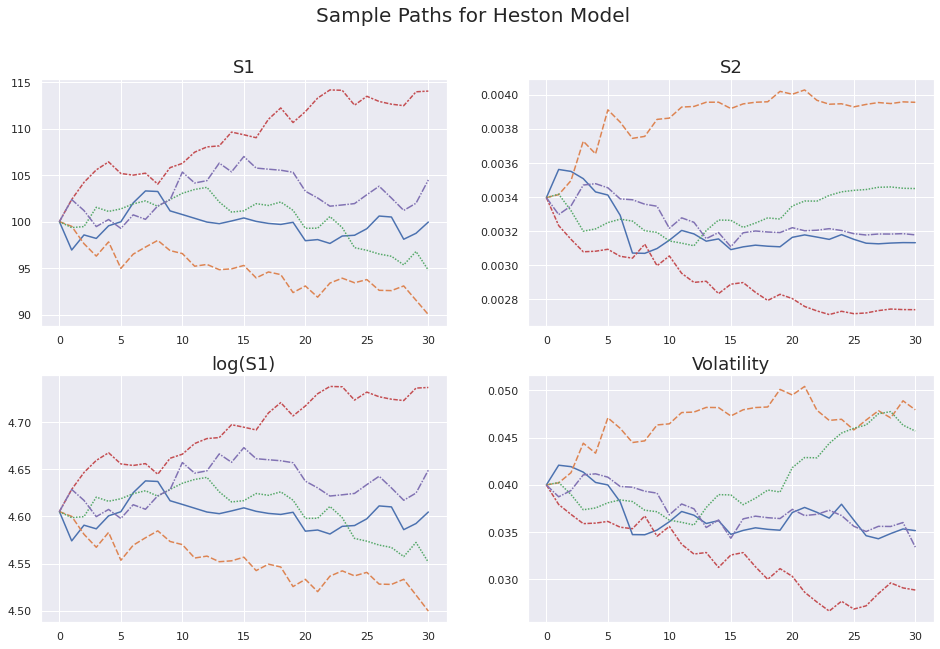

In [6]:
############# Plot Sample Path ################

sample_Heston, axes = plt.subplots(2,2,figsize=(16, 10))
sample_Heston.suptitle('Sample Paths for Heston Model',fontsize= 20)

idx = list(np.random.randint(N_sample, size=5))

sns.lineplot(data=df_spot.loc[idx,:].transpose(),legend=False, ax = axes[0,0])
axes[0,0].set_title("S1",fontsize= 18)
sns.lineplot(data=np.log(df_spot.loc[idx,:].transpose()),legend=False, ax = axes[1,0])
axes[1,0].set_title("log(S1)",fontsize= 18)
sns.lineplot(data=df_s2.loc[idx,:].transpose(),legend=False, ax = axes[0,1])
axes[0,1].set_title("S2",fontsize= 18)
sns.lineplot(data=df_vol.loc[idx,:].transpose(),legend=False, ax = axes[1,1])
axes[1,1].set_title("Volatility",fontsize= 18)

plt.show()

#### 3.1.1 Deep Hedging

In this part, we build a semi-recurrent deep neural network to learn the delta hedging strategy.

We present in the cell below all the hyper-parameters needed for our experiments (gathered by where they are used in the experiments). For parameter with a different name between original paper and coding, we comment its name in the paper on the same line. Most of the values are the same as what's being used in the paper, but we have to change a little bit:

-   In the original paper, sigma (volatility of volatility in Heston model) is set to 2, which is way too large to generate a reasonable path for both price of stock and its volatility. Most (>50%) paths would have 0 volatility in the end. It is not a typo as all other results match with those in the paper if we set sigma=2. Still, we changed it to 0.1, which permits a better simulation of real market data, and also promising results for our experiments.

- The original paper does not provide the exact number of samples generated for each test. However we estimated it from y-axis in paper image to be around 4e6 for training and 1e6 for testing. Due to the memory limit of Google Colab, we have to limit it to 1e6, and reuse it once (epoch=2). Despite that, our experiments still generates good results. Also, because TensorFlow can not handle last batch very well when computing batch loss, we set number of sample a magnitude of batch size 256. So total number of path generated are 204800 and train:test = 0.9:0.1.

- The original paper does not mention rescaling of input data. However the scale of S2 (1e-3) and Volatility(1e-2) are so small (compared to S1 and log(S1)) that NN can not be trained effectively. So we rescale both to a magnitude of 1e0.

In [7]:
# network param
input_shape = (T+1,d,)
hidden_dim = (d+15,d+15)
CVar_alpha = 0.5             # level of risk averse
is_simple = False            # True:feed forward, False:semi recurrent

# training param
scale_vol = 100
scale_s2 = 1000
lr = 0.005                   # learning rate
p_train,p_val = 0.9, 0.1     # number of training sample : number of testing sample
batch_size = 256
n_epochs = 2                 
proportional_cost = 0        # coefficient for proportional transaction cost
punishment = None            # punishment for rebalancing position too frequently               


In [8]:
############## Prepare Data for NN ################

# df --> ndarray
info = np.ones((N_sample,T+1,d))
info[:,:,0] = np.log(df_spot.to_numpy())
info[:,:,1] = df_vol.to_numpy()*scale_vol
price = np.ones((N_sample,T+1,d))
price[:,:,0] = df_spot.to_numpy()
price[:,:,1] = df_s2.to_numpy()*scale_s2

# train/val split
for data in ['info','price']:
    df = globals()[data]
    globals()[data+'_train'] = df[:int(p_train*N_sample)]
    globals()[data+'_val'] = df[int(p_train*N_sample):]

In [9]:
################ Create NN class ####################

class SemiRecurrentNN:
    def __init__(self,input_shape,hidden_dim,CVar_alpha,proportional_cost,punishment=None,is_simple=False,verbose=True):
        self.punishment = punishment
        self.CVar_alpha = CVar_alpha
        self.proportional_cost = proportional_cost
        self.build_model(input_shape,hidden_dim,is_simple,verbose)

        
    def build_model(self,input_shape,hidden_dim,is_simple=False,verbose=True):
        self.inputs = tf.keras.layers.Input(shape=input_shape,name='input')
        self.outputs = []
        for t in range(input_shape[0]-1): # build network for time t
            self.build_block(t,hidden_dim,is_simple)
        self.outputs = tf.keras.layers.Lambda(lambda x:tf.stack(x, axis=1),name='output')(self.outputs)
        self.model = tf.keras.models.Model(inputs=self.inputs, outputs=self.outputs)
        self.model.compile(loss=self.loss_CVar, optimizer=tf.keras.optimizers.Adam(lr))
        if verbose:
            self.model.summary()
        
        
    def fit(self, info, price, batch_size, n_epochs, inputs_val=None, price_val=None):
        if inputs_val is not None:
            self.model.fit(info, price, batch_size=batch_size, epochs=n_epochs,
                                       validation_data=(inputs_val,price_val))
        else:
            self.model.fit(info, price, batch_size=batch_size, epochs=n_epochs)
            
    
    def predict(self,info_val,price):
        delta = self.model.predict(info_val)
        pnl = self.PnL(price,delta)
        CVar, _ = tf.nn.top_k(-pnl, tf.cast((1-self.CVar_alpha)*batch_size, tf.int32))
        p_theta = tf.reduce_mean(CVar)
        return delta,pnl,p_theta
    
    
    # loss function in keras loss function signiture
    def loss_CVar(self,price,delta):
        pnl = self.PnL(price,delta)
        CVar, _ = tf.nn.top_k(-pnl, tf.cast((1-self.CVar_alpha)*batch_size, tf.int32))
        return tf.reduce_mean(CVar)
        if self.punishment is not None:
            lam = self.punishment['lam']
            zero_day = self.punishment['zero_day']
            punishment_cost = lam*tf.reduce_sum(tf.math.square(delta[:,zero_day,:]))
            return tf.reduce_mean(CVar)+punishment_cost
    
    
    # network for time t_k
    def build_block(self,t,hidden_dim,is_simple=False):
        
        ############ input layer ############
        info = tf.keras.layers.Lambda(lambda x: x[:,t,:],name='info_'+str(t))(self.inputs)
                                                        # log(s1) and v at time t
        if t==0 or is_simple:       # first trading date
            inputs = info
        else:       # not the first trading date
            holdings = self.outputs[t-1]        # holdings at time t-1
            inputs = tf.keras.layers.Lambda(lambda x:tf.concat(x,axis=1),name='info_delta_'+str(t))([holdings,info])
            
        ########## hidden layers ########
        hidden1 = self.dense_layer(inputs,hidden_dim[0],name='hidden1_'+str(t))
        hidden2 = self.dense_layer(hidden1,hidden_dim[1],name='hidden2_'+str(t))
        output = tf.keras.layers.Dense(input_shape[1],name='out_'+str(t)+'_dense')(hidden2)
        
        ########### output ###########
        self.outputs.append(output)

        
    # hidden layer structure
    def dense_layer(self,inputs,dim,name):
        hidden = tf.keras.layers.Dense(dim,name=name+'_dense')(inputs)
        hidden_bn = tf.keras.layers.BatchNormalization(name=name+'_bn')(hidden)
        hidden_activated = tf.keras.layers.Activation('relu',name=name+'_relu')(hidden_bn)
        return hidden_activated
                                                

    def PnL(self,price,delta):

        # Compute trading loss
        d_price = price[:,1:,:]-price[:,:-1,:]
        trading_loss = tf.reduce_sum(d_price*delta, axis=[1,2])

        # Compute -Z
        Z_ = -tf.maximum(price[:,-1,0]-price[:,0,0],0)

        pnl = tf.add(tf.cast(trading_loss, tf.float32), tf.cast(Z_,tf.float32))

        # Compute proportional transaction cost
        if self.proportional_cost!=0:
            paddings = tf.constant([[0,0],[1,1],[0,0]])         # add the initial and final position (=0)
            delta = tf.pad(delta, paddings, "CONSTANT")
            d_delta = tf.abs(delta[:,1:,:]-delta[:,:-1,:])
            C = -tf.reduce_sum(d_delta*price*self.proportional_cost,axis=[1,2])
            pnl = tf.add(tf.cast(C,tf.float32),pnl)
        return pnl

Build NN and display its structure.

In [10]:
############### Build NN ##################
semi_recurrent_nn = SemiRecurrentNN(input_shape,hidden_dim,CVar_alpha,proportional_cost,punishment,
                                    is_simple,verbose=True)

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, 31, 2)]      0                                            
__________________________________________________________________________________________________
info_0 (Lambda)                 (None, 2)            0           input[0][0]                      
__________________________________________________________________________________________________
hidden1_0_dense (Dense)         (None, 17)           51          info_0[0][0]                     
__________________________________________________________________________________________________
hidden1_0_bn (BatchNormalizatio (None, 17)           68          hidden1_0_dense[0][0]            
_______________________________________________________________________________________

Train NN for 2 epochs.

In [11]:
############### Train NN ##################
semi_recurrent_nn.fit(info_train, price_train, batch_size, n_epochs,info_val,price_val)

Epoch 1/2
3600/3600 [==============================] - 104s 29ms/step - loss: 3.8320 - val_loss: 7.4354
Epoch 2/2
3600/3600 [==============================] - 103s 29ms/step - loss: 2.8623 - val_loss: 3.9056


Predict validation set (again because during validation pnl and delta are not saved).

In [12]:
delta_val,pnl_val,p_val = semi_recurrent_nn.predict(info_val, price_val)



Sample path and delta computed using NN.



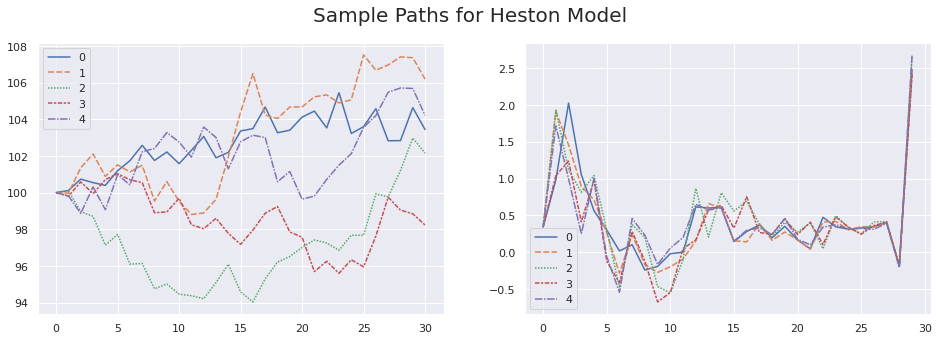

In [13]:
sample_Heston, axes = plt.subplots(1, 2, figsize=(16, 5))
sample_Heston.suptitle('Sample Paths for Heston Model',fontsize= 20)

idx = np.random.randint(0,1000,5)
sns.lineplot(data=price_val[idx,:,0].transpose(), ax=axes[0])
sns.lineplot(data=delta_val[idx,:,1].transpose(), ax=axes[1])
plt.show()

Display indifference price compared to risk-neutral price.

In [16]:
################### Compute risk-neutral/adjusted price ######################
payoff = np.maximum(df_spot.iloc[:,-1]-df_spot.iloc[:,0],0)
q = np.mean(payoff)  # risk neutral
p = np.mean(np.sort(np.maximum(df_spot.iloc[:,-1]-df_spot.iloc[:,0],0))[-1-int(N_sample/2):-1])  # risk adjusted
print('risk-neutral price {}, risk-adjusted price {}'.format(q,p))

risk-neutral price 2.2857551830329697, risk-adjusted price 4.571455194583846


Plot pnl distribution in comparison with that using Heston model hedge. Note that we add risk-neutral price to both  because this would reflect true pnl with initial cash compensation, rather than payoff at time T.

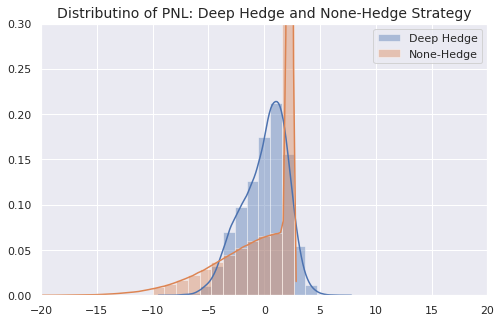

In [17]:
plt.figure(figsize=(8,5))
sns.distplot(pnl_val+q,bins =list(np.linspace(-10,10,20)),label='Deep Hedge')
sns.distplot(-payoff+q,bins=list(np.linspace(-10,10,20)),label='None-Hedge')
plt.xlim([-20,20])
plt.ylim([0,0.3])
plt.legend()
plt.title("Distributino of PNL: Deep Hedge and None-Hedge Strategy",fontsize=14)
plt.show()

#### 3.1.2 Heston Model Hedging

The price of the European option matures at $T$, denoted by $g(S^1_T)$, can be expressed as

$$
g\left(S_{T}^{1}\right)=q+\int_{0}^{T} \delta_{t}^{1} \mathrm{d} S_{t}^{1}+\int_{0}^{T} \delta_{t}^{2} \mathrm{d} S_{t}^{2}
$$

where $q=\mathbb{E}_{\mathbb{Q}}\left[g\left(S_{T}^{1}\right)\right]$ and

$$
\delta_{t}^{1}:=\partial_{s} u\left(t, S_{t}^{1}, V_{t}\right) \text { and } \delta_{t}^{2}:=\frac{\partial_{v} u\left(t, S_{t}^{1}, V_{t}\right)}{\partial_{v} L\left(t, V_{t}\right)}
$$

Therefore, the portfolio $X=-Z+\delta^1S^1+\delta^2S^2$ is risk-free in theory. Since trading $S^2_t$ is equivalent to trading $V_t$, we instead consider this portfolio

$$
X = -Z+\frac{\partial Z}{\partial S^1}S^1+\frac{\partial Z}{\partial V}V 
$$

We consider a 30-day-window and compute the $Delta$ and $Vega$ for each set of $(S^1,V,t)$ on a grid in Matlab and interpolate the grid to get a function in Python that helps to compute these greeks efficiently. We choose 50000 simulated path and hedge the option liability using the strategy implied by Heston model. Finally, we compare the distribution of profits and losses at maturity with the results from deep hedging.

In [18]:
# load delta and vega
dataFile = './greeks_01.mat'
data = scio.loadmat(dataFile)
delta = data['delta']
vega = data['vega']

N_path = 50000 # take 50000 paths

In [19]:
v = df_vol.to_numpy()[:N_path,:]
s1 = price[:N_path,:,0]

pnls_heston = []
pnls_unhedged = []

get_delta = []
get_vega = []

x = np.array([1e-6,1e-5,1e-4,0.0005,1e-3,0.005,0.01,0.03,0.05,0.07,0.09,0.12,0.15])
y = np.array([70,80,85,90,94,96,98,100,102,104,106,110,115,120,130]) #s

T = 30
for t in range(T):
    get_delta.append(interpolate.interp2d(x,y, delta[t], kind='linear'))
    get_vega.append(interpolate.interp2d(x,y, vega[t], kind='linear'))  

dprice = np.diff(s1,axis=1)
dv = np.diff(v,axis=1)

d1 = np.ones(T)
d2 = np.ones(T)
for i in range(N_path):
    for t in range(T):
        d1[t] = get_delta[t](v[i,t],s1[i,t])
        d2[t] = get_vega[t](v[i,t],s1[i,t])

    pnls_unhedged.append(-np.maximum(s1[i,T]-spot,0))
    pnls_heston.append(pnls_unhedged[-1]+sum(d1*dprice[i]+d2*dv[i]))

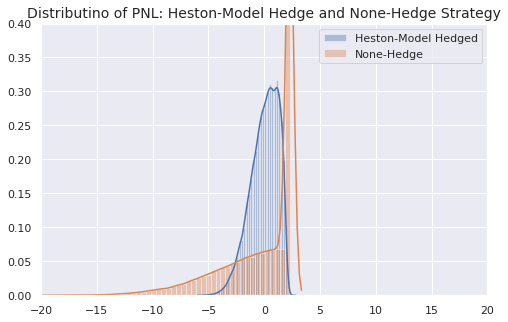

In [20]:
plt.figure(figsize=(8,5))
sns.distplot(np.asarray(pnls_heston)+q,label='Heston-Model Hedged')
sns.distplot(np.asarray(pnls_unhedged)+q,label='None-Hedge') 
plt.xlim([-20,20])
plt.ylim([0,0.4])
plt.legend()
plt.title("Distributino of PNL: Heston-Model Hedge and None-Hedge Strategy",fontsize=14)
plt.show()

#### 3.1.3 Performance comparison

Lets first compute the CVaR($\alpha=0.5$) (risk-neural-price-centered) of the three strategies.

In [23]:
cvar_none = np.mean(np.sort(pnls_unhedged)[:int(N_path*0.5)])+q
cvar_model = np.mean(np.sort(pnls_heston)[:int(N_path*0.5)])+q
cvar_deep = np.mean(np.sort(pnl_val)[:int(len(pnl_val)*0.5)])+q
print("50% CVaR of non-hedging strategy is {}\n50% CVaR of deep-hedging strategy is {} \n50% CVaR of model-hedging strategy is {}".format(cvar_none,cvar_deep,cvar_model))

50% CVaR of non-hedging strategy is -2.2857991370726096
50% CVaR of deep-hedging strategy is -1.6251778346977432 
50% CVaR of model-hedging strategy is -0.9982630239246935


From the distribution plot, we can also observe that Model Hedge outperforms Deep Hedge, which is already a significant improvement from None-Hedge strategy.

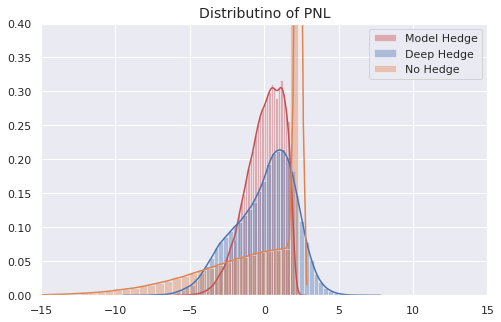

In [26]:
plt.figure(figsize=(8,5))
sns.distplot(np.array(pnls_heston)+q,color='r',label='Model Hedge')
sns.distplot(pnl_val+q,label='Deep Hedge')
sns.distplot(-payoff+q,label='No Hedge')
plt.xlim([-15,15])
plt.ylim([0,0.4])
plt.legend()
plt.title("Distributino of PNL",fontsize=14)
plt.show()

### 3.2 Hedging on SXP500 Data

Below are some details about experiment 2.

- We want to test NN's performance for at-the-money call option with 30 days maturity.
- Portfoliio rebalancing is only allowed weekly for both BS and NN hedging( by imposing a punishment.)
- Inputs for NN are recover log(price) from generated return by DJR-GARCH model.
- Hedging instrument is SP500 index.
- We still use Adam to do gradient decent for NN.
- We test it with rolling window.

Below is a picture illustrating the whole design.
![title](SP500.png)

#### 3.2.0 GARCH-Based Estimation

In order to calculate the delta according to BS model, we need an estimator for the volatility of stock price. Here we choose  a GJR-GARCH model with tdistributed innovations, i.e. $z_k$ are $i.i.d.$ t-distributed with 
$\nu$ degrees of freedom and

$$
\begin{aligned}
\log \left(S_{k} / S_{k-1}\right) &=\mu+\varepsilon_{k} \\
\varepsilon_{k} &=\sigma_{k} z_{k} \\
\sigma_{k}^{2} &=\omega+\alpha \varepsilon_{k-1}^{2}+\beta \sigma_{k-1}^{2}+\gamma \varepsilon_{k-1}^{2} 1_{\left\{\varepsilon_{k-1}<0\right\}}
\end{aligned}
$$

More specifically, current period's volatility is filtered with a GARCH model fitted on series of the past 1170 days. We'll estimate the PNL applying the BS delta hedging strategy on a 30-day-rolling window that moves 5 days forward each time.



We first show how to fit an GARCH model. Below are the hyper-parameters. Note that in paper we use 2e7 generated sample each time we want to train the NN. However we found this precess extremely time-consuming and we could not afford to run it even once (takes a few hours). This might be caused by the ineffeciency of our code or the nature of this experiment. Therefore we have to set N_sample = 256, which is equal to the size of one batch. Sadly enough it still causes Google Colab to crash due to memory limit overflow after 200+ experiments...

In [27]:
# experiment param
N_experiment = 300            # total number of windows
T_window = 1200               # window length
stride = 5                    # rolling window forward by a week
T = 30                        # the last 30 days of every window is saved as test set
N_sample = 256                # number of sequence generated to train the NN

# GARCH param
scale_return = 1000           # scale return by 1000 before fitting to a GARCH model

First download data from Yahoo Finance using `yfinance` package.

In [28]:
################ Download SP500 data from yfinance #################
sp500_data = yf.download("SPY", start="2007-05-01", end="2020-08-05")
sp500_data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-05-01,148.419998,149.470001,147.669998,148.669998,113.351807,134342700
2007-05-02,148.899994,149.949997,148.750000,149.539993,114.015091,87129800
2007-05-03,149.970001,150.399994,149.729996,150.350006,114.632660,86569700
2007-05-04,150.750000,151.119995,150.220001,150.919998,115.067284,96409000
2007-05-07,150.880005,151.199997,150.809998,150.949997,115.090164,63461400
...,...,...,...,...,...,...
2020-07-29,322.119995,325.730011,322.079987,325.119995,325.119995,48454200
2020-07-30,321.899994,324.410004,319.640015,323.959991,323.959991,61861700
2020-07-31,325.899994,326.630005,321.329987,326.519989,326.519989,85210800


Calculate log return. Final data we will use contains 1. adjusted close price and 2. log return.

In [29]:
################ Calculate log return #################
sp500_data['return'] = np.log(sp500_data.loc[:,'Adj Close']).diff()
sp500_data.dropna(inplace=True)
sp500_data = sp500_data[['Adj Close','return']]
sp500_data

,Adj Close,return
Date,,
2007-05-02,114.015091,0.005835
2007-05-03,114.632660,0.005402
2007-05-04,115.067284,0.003784
2007-05-07,115.090164,0.000199
2007-05-08,114.937637,-0.001326
...,...,...
2020-07-29,325.119995,0.012224
2020-07-30,323.959991,-0.003574
2020-07-31,326.519989,0.007871


Get index for each experiment data.

In [30]:
################# Compute experiment window index ####################
def compute_window_index(window_len, N_experiment, stride):
    return np.arange(window_len+1)+np.arange(N_experiment).reshape((-1,1))*stride
window_index = compute_window_index(T_window, N_experiment, stride)
window_index

array([[   0,    1,    2, ..., 1198, 1199, 1200],
       [   5,    6,    7, ..., 1203, 1204, 1205],
       [  10,   11,   12, ..., 1208, 1209, 1210],
       ...,
       [1485, 1486, 1487, ..., 2683, 2684, 2685],
       [1490, 1491, 1492, ..., 2688, 2689, 2690],
       [1495, 1496, 1497, ..., 2693, 2694, 2695]])

Build a generator that generate training and testing data for each experiment.

In [31]:
################### Window generator #########################
sp500_return = sp500_data['return'].values[len(sp500_data['return'])-window_index[-1,-1]-1:]*scale_return
sp500_price = sp500_data['Adj Close'].values[len(sp500_data['return'])-window_index[-1,-1]-1:]
sp500_data = sp500_data.values[len(sp500_data)-window_index[-1,-1]-1:]
def window_generator(window_index):
    for idx in window_index:
        window = sp500_data[idx,:]
        yield window[:-T-1], window[-T-1:]

In [32]:
################ Build simulation generator ##################
def garch_generator(return_window):
    gjr_garch = arch_model(return_window, p=1, o=1, q=1, power=2, dist='StudentsT')
    res = gjr_garch.fit(disp='off')
    gir_garch_sim = arch_model(None, p=1, o=1, q=1, power=2, dist='StudentsT')
    for _ in range(N_sample):
        yield gir_garch_sim.simulate(res.params, T_test)

#### 3.2.1 Deep Hedging

Below are the parameters different from those used in Heston model experiment.

In [33]:
# setting changed
d = 1                         # number of instruments

# network param changed
input_shape = (T+1,d,)
hidden_dim = (20,20)
CVar_alpha = 0.75             # level of risk averse

# training param changed
lr = 0.0001                   # learning rate
n_epochs = 1                  # we only use every sample once, because we can generate numerous samples
proportional_cost = 0
day = np.arange(31)
punishment = {'lam':1e6, 'zero_day':day[day%5!=0]}
                              # lam: punishment parameter for frequent transactions
                              # zero_day: days that transaction should be 0

Create the NN class.

In [34]:
################ Create NN class ####################

class SemiRecurrentNN:
    
    def __init__(self,input_shape,hidden_dim,CVar_alpha,proportional_cost,punishment=None,is_simple=False,verbose=True):
        self.punishment = punishment
        self.CVar_alpha = CVar_alpha
        self.proportional_cost = proportional_cost
        self.input_shape = input_shape
        self.build_model(input_shape,hidden_dim,is_simple,verbose)

        
    def build_model(self,input_shape,hidden_dim,is_simple=False,verbose=True):
        self.inputs = tf.keras.layers.Input(shape=input_shape,name='input')
        self.outputs = []
        for t in range(input_shape[0]-1): # build network for time t
            self.build_block(t,hidden_dim,is_simple)
        self.outputs = tf.keras.layers.Lambda(lambda x:tf.stack(x, axis=1),name='output')(self.outputs)
        self.model = tf.keras.models.Model(inputs=self.inputs, outputs=self.outputs)
        self.model.compile(loss=self.loss_CVar, optimizer=tf.keras.optimizers.Adam(lr))
        if verbose:
            self.model.summary()
        
        
    def fit(self, info, price, batch_size, n_epochs, inputs_val=None, price_val=None):
        if inputs_val is not None:
            self.model.fit(info, price, batch_size=batch_size, epochs=n_epochs,
                                       validation_data=(inputs_val,price_val))
        else:
            self.model.fit(info, price, batch_size=batch_size, epochs=n_epochs)
            
    
    def predict(self,info_val,price,pnl_only=False):
        
        delta = self.model.predict(info_val)
        pnl = self.PnL(price,delta)
        if pnl_only:
            return pnl
        CVar, _ = tf.nn.top_k(-pnl, tf.cast((1-self.CVar_alpha)*batch_size, tf.int32))
        p_theta = tf.reduce_mean(CVar)
        return delta,pnl,p_theta
    
    
    # loss function in keras loss function signiture
    def loss_CVar(self,price,delta):
        pnl = self.PnL(price,delta)
        CVar, _ = tf.nn.top_k(-pnl, tf.cast((1-self.CVar_alpha)*batch_size, tf.int32))
        if self.punishment is not None:
            lam = self.punishment['lam']
            zero_day = self.punishment['zero_day']
            punishment_cost = 0
            for i in zero_day:
                punishment_cost += tf.reduce_sum(tf.math.square(delta[:,i,:] if self.input_shape[1]>1 else delta[:,i]))
            punishment_cost*=lam
        return tf.reduce_mean(CVar)+punishment_cost
    
    
    # network for time t_k
    def build_block(self,t,hidden_dim,is_simple=False):
        
        ############ input layer ############
        if self.input_shape[1]>1:
            info = tf.keras.layers.Lambda(lambda x: x[:,t,:],name='info_'+str(t))(self.inputs)
        else:
            info = tf.keras.layers.Lambda(lambda x: x[:,t],name='info_'+str(t))(self.inputs)
                                                        # log(s1) and v at time t
        if t==0 or is_simple:       # first trading date
            inputs = info
        else:       # not the first trading date
            holdings = self.outputs[t-1]        # holdings at time t-1
            inputs = tf.keras.layers.Lambda(lambda x:tf.concat(x,axis=1),name='info_delta_'+str(t))([holdings,info])
            
        ########## hidden layers ########
        hidden1 = self.dense_layer(inputs,hidden_dim[0],name='hidden1_'+str(t))
        hidden2 = self.dense_layer(hidden1,hidden_dim[1],name='hidden2_'+str(t))
        output = tf.keras.layers.Dense(input_shape[1],name='out_'+str(t)+'_dense')(hidden2)
        
        ########### output ###########
        self.outputs.append(output)

        
    # hidden layer structure
    def dense_layer(self,inputs,dim,name):
        hidden = tf.keras.layers.Dense(dim,name=name+'_dense')(inputs)
        hidden_bn = tf.keras.layers.BatchNormalization(name=name+'_bn')(hidden)
        hidden_activated = tf.keras.layers.Activation('relu',name=name+'_relu')(hidden_bn)
        return hidden_activated
                                                

    def PnL(self,price,delta):

        dim = self.input_shape[1]

        # Compute trading loss
        if dim>1:
            d_price = price[:,1:,:]-price[:,:-1,:]
            trading_loss = tf.reduce_sum(d_price*delta, axis=[1,2])
        else:
            if len(delta.shape)==3:
                delta = tf.squeeze(delta,axis=2)
            d_price = price[:,1:]-price[:,:-1]
            trading_loss = tf.reduce_sum(d_price*delta, axis=1)

        # Compute -Z
        if dim>1:
            Z_ = -tf.maximum(price[:,-1,0]-price[:,0,0],0)
        else:
            Z_ = -tf.maximum(price[:,-1]-price[:,0],0)

        pnl = tf.add(tf.cast(trading_loss, tf.float32), tf.cast(Z_,tf.float32))

        # Compute proportional transaction cost
        if self.proportional_cost!=0:
            if dim>1:
                paddings = tf.constant([[0,0],[1,1],[0,0]])         # add the initial and final position (=0)
                delta = tf.pad(delta, paddings, "CONSTANT")
                d_delta = tf.abs(delta[:,1:,:]-delta[:,:-1,:])
                C = -tf.reduce_sum(d_delta*price*self.proportional_cost,axis=[1,2])
            else:
                paddings = tf.constant([[0,0],[1,1]])
                delta = tf.pad(delta, paddings, "CONSTANT")
                d_delta = tf.abs(delta[:,1:]-delta[:,:-1])
                C = -tf.reduce_sum(d_delta*price*self.proportional_cost,axis=1)
            pnl = tf.add(tf.cast(C,tf.float32),pnl)

        return pnl

        

Create a class for experiment. Each experiment takes in the log return and original price as inputs, and outputs pn l on test set.

`garch_simulation` fit training data to a GJR-GARCH model, and generate 2e7 samples with length 30 days.

`train_nn` train NN with simulated data.

`test_nn` test NN on testing data, and save the pnl result in `self.result`.

In [35]:
class Experiment:
    def __init__(self, train, test):
        self.train = train
        self.test = test
        self.garch_simulation()
        self.train_nn()
        self.test_nn()
    
    def garch_simulation(self):
        return_seq = self.train[:,1]*scale_return
        gjr_garch = arch_model(return_seq.squeeze(), p=1, o=1, q=1, power=2, dist='StudentsT')
        res = gjr_garch.fit(disp='off')
        gir_garch_sim = arch_model(None, p=1, o=1, q=1, power=2, dist='StudentsT')
        self.sample = pd.DataFrame(index = list(range(N_sample)), columns = list(range(31)))
        self.sample = self.sample.astype('float')
        self.price = pd.DataFrame(index = list(range(N_sample)), columns = list(range(31)))
        self.price = self.price.astype('float')
        for i in range(N_sample):
            sample_ = gir_garch_sim.simulate(res.params, T)['data'].to_frame().squeeze()
            self.sample.iloc[i,:] = self.return2logs(sample_/scale_return,100)
            self.price.iloc[i,:] = np.exp(self.sample.to_numpy()[i,:])
    
    def train_nn(self):
        self.nn = SemiRecurrentNN(input_shape,hidden_dim,CVar_alpha,proportional_cost,punishment,verbose=False)
        self.nn.fit(tf.convert_to_tensor(self.sample.to_numpy()), tf.convert_to_tensor(self.price.to_numpy()), batch_size, n_epochs)

    def test_nn(self):
        self.result = self.nn.predict(np.expand_dims(self.return2logs(self.test[1:,1]),axis=0), 
                                      np.expand_dims(self.test[:,0],axis=0),
                                      pnl_only=True)
        
    def return2logs(self,return_seq, initial_price=100):
        return np.concatenate([[0],return_seq]) + np.log(initial_price)




Compute pnl from 300 experiments. Note that the loss is very high as a single batch with a small learning rate is not enough for the NN to minimize its trading constrain punishment (only allow weekly rebalancing).

Though trying to reduce the training samples of each experiment, running 300 experiments still exceeds the RAM limit. We admit that using only 256 training samples is likely to generate unstable results. And probably the  the network is not very well tuned so as to generate a satisfactory hedging performance.

In [ ]:
pnl = []
i=1
for return_window in window_generator(window_index):
    experiment = Experiment(*return_window)
    pnl.append(experiment.result[0])
    print(f'experiment {i}/{N_experiment} finished, pnl: {pnl[-1]}')
    i+=1
pnl

1/1 [==============================] - 0s 2ms/step - loss: 3394523904.0000
experiment 1/300 finished, pnl: -3.9577691555023193
1/1 [==============================] - 0s 2ms/step - loss: 4927311360.0000
experiment 2/300 finished, pnl: 2.889592170715332
1/1 [==============================] - 0s 2ms/step - loss: 5182398976.0000
experiment 3/300 finished, pnl: -3.419064521789551
1/1 [==============================] - 0s 1ms/step - loss: 4383074304.0000
experiment 4/300 finished, pnl: -7.5999979972839355
1/1 [==============================] - 0s 3ms/step - loss: 7530452480.0000
experiment 5/300 finished, pnl: -3.0891170501708984
1/1 [==============================] - 0s 4ms/step - loss: 5410428928.0000
experiment 6/300 finished, pnl: -4.315942764282227
1/1 [==============================] - 0s 2ms/step - loss: 4324642816.0000
experiment 7/300 finished, pnl: 2.179698944091797
1/1 [==============================] - 0s 3ms/step - loss: 5547228160.0000
experiment 8/300 finished, pnl: -0.0710208

#### 3.2.2 Black-Shoeles Model Hedging

The strategy is to hedge the liability of option with $\Delta$ unit of stock. The portolio is 

$$
X_t = -Z_t + N(d^1_t)S_t
$$

where

$$
d^1_t = \frac{\log{(S_t/K)}+(r+\sigma^2/2)T}{\sigma \sqrt{T}}
$$

In [36]:
end_loc = 1170
gjr_garch = arch_model(sp500_return, p=1, o=1, q=1, power=2, dist='StudentsT')

# compute Black-Shoeles Based delta 
def bs_delta(st,sig,r,T,k=100):
  r *= 365
  sig *= np.sqrt(365)
  T /= 365
  d1 = (np.log(st/k)+(r+sig**2/2)*T)/(sig*np.sqrt(T))
  return norm.cdf(d1)

pnls_bs_hedged = []
pnls_unhedged = []
deltas = []

# 
for t in range(N_experiment):
  start_time = window_index[t,end_loc]
  s1  = sp500_price/sp500_price[start_time]*spot  # normalize stock price
  interval = 5  # rebalance weekly
  d = []
  pnl = 0;
  for i in window_index[t,end_loc:-interval:interval]:
    res = gjr_garch.fit(first_obs=i-end_loc, last_obs=i, disp='off')  # fit garch model based on previous 1170 days
    temp = res.forecast(horizon=1).variance  # filter variance
    mu = res.forecast(horizon=1).mean  # filter mean
    
    d.append(bs_delta(s1[i],temp.iloc[i]/1000,mu.iloc[i]/1000,window_index[t,-1]-i))
    pnl += d[-1]*(s1[i+interval]-s1[i])
  deltas.append(d)
  pnls_unhedged.append(-np.maximum(s1[i+interval]-spot,0))
  pnls_bs_hedged .append(pnl+pnls_unhedged[-1])

  if t % 50 ==0:
    print('{}th experiment completed'.format(t))

0th experiment completed
50th experiment completed
100th experiment completed
150th experiment completed
200th experiment completed
250th experiment completed


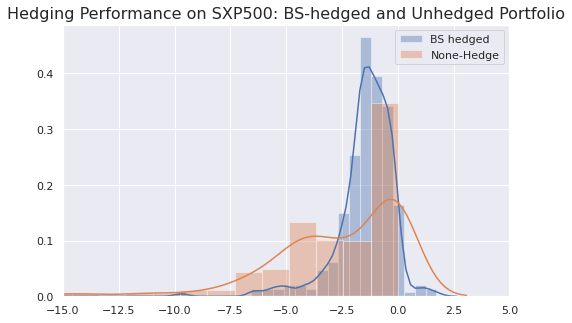

In [37]:
plt.figure(figsize=(8,5))
sns.distplot(pnls_bs_hedged ,label='BS hedged')
sns.distplot(pnls_unhedged,label='None-Hedge')
plt.legend()
plt.xlim([-15,5])
plt.title('Hedging Performance on SXP500: BS-hedged and Unhedged Portfolio',fontsize=16)
plt.show()

In [38]:
cvar_bs_hedge = np.mean(np.sort(np.array(pnls_bs_hedged),axis=0)[:150])
cvar_bs_nonhedge = np.mean(np.sort(np.array(pnls_unhedged))[:150])
print("50% CVar of the BS-hedged portfolio is {}, 50% CVar of the unhedged portfolio is {}".format(cvar_bs_hedge ,cvar_bs_nonhedge))

50% CVar of the BS-hedged portfolio is -2.7620337258254755, 50% CVar of the unhedged portfolio is -4.959525762215525


The result that BS-hedging significantly reduce the risk (in terms of 50% CVar) is consistent with the literature.

## 4 Conclusion and discussions

- The replication exercise supports that we can use NN to learn an efficient hedging strategy.  

- From the experiment on the simulated data, Deep Hedging successfully reduce the 50% CVar (on validation sete) from 2.3 to 1.7, although not as good as the performance of Heston-Based Model Hedging (50% CVar only 1). Though, our result is not fully consistent with the original paper. The performance of each strategy seems to be more satisfactory in the paper. For example, the 50% CVar of deep hedging on simulated data is only 0.25, far lass than ours (1.7). And Deep hedging doesn't outperforms model hedging as is the case in the paper. The reason can be insufficient training data (we simulate 1024000, while the original paper uses far more), and that we choose a different $\sigma$. The loss value does not seems to fully converge during training. Besides, our neural network and estimating approach might differ from the paper's because they're not fully specified. These subtle differences may also contribute to the variance of the results. 

- For the experiment on SPX500, we feel sorry that due to memory and computation constraints we are not able to exercise our code. Despite that, we learned a lot from the design of this experiment. We propose that it may be possible to replace GJR-GARCH model by GANs (Generative Adversarial Neural Networks), which will also generate sample paths of market price data in "parallel world" and is proven to outperform GARCH model.

- The author of the paper also includes other experiments, which utilize the `is_simple` and `proportional_cost` parameters in NN class. We include these features when designing the class, but have not got enough time to perform these experiments.

- Although this paper states that it uses the strategy of Reinforcement Learning, its network structures actually belong to Deep Learning. We found some papers implementing DQN (Deep Q-Learning) to hedge, and we think theoritically (given enough market data) DQN might be more powerful and more suitable for solving hedging problems.

## 5 Reference 
[1] Buehler, Hans, et al. "Deep hedging." Quantitative Finance 19.8 (2019): 1271-1291.